# EDA on Employee Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Data = pd.read_csv(r"C:\Users\Deepak Chaudhary\Downloads\archive\test.csv")
Data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,3,80,0,16,2,4,15,9,10,10
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,1,80,1,1,3,3,1,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,3,80,0,4,2,2,0,0,0,0
3,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,4,...,3,80,1,1,2,3,1,0,0,0
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,1,1496,2,...,2,80,0,16,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
408,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
409,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
410,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


## ->Which age group travels the most?

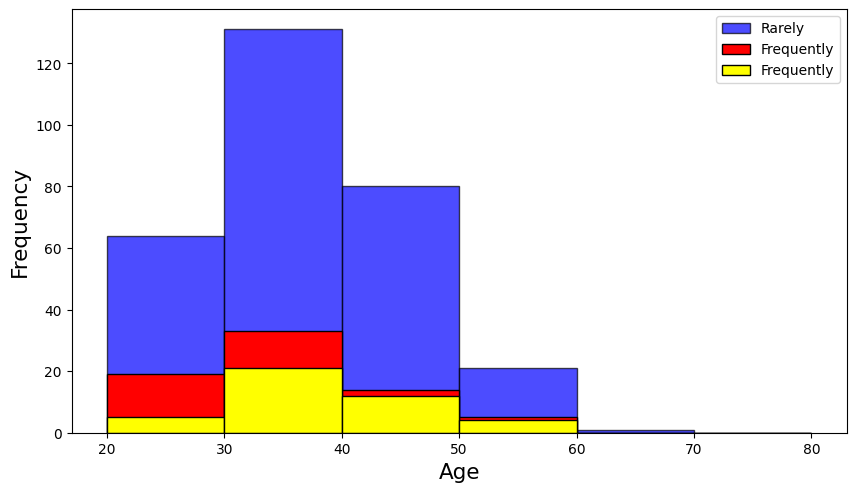

In [199]:
tra_rarely = Data.loc[Data[Data['BusinessTravel']=='Travel_Rarely'].index.values,'Age'].tolist()
tra_freq = Data.loc[Data[Data['BusinessTravel']=='Travel_Frequently'].index.values,'Age'].tolist()
tra_non = Data.loc[Data[Data['BusinessTravel']=='Non-Travel'].index.values,'Age'].tolist()
l = [20,30,40,50,60,70,80]
plt.hist(tra_rarely,color = 'blue',bins = l,edgecolor ='black',label = 'Rarely',alpha=0.7)
plt.hist(tra_freq,color = 'red',bins = l,edgecolor ='black',label = 'Frequently')
plt.hist(tra_non,color = 'yellow',bins = l,edgecolor ='black',label = 'Frequently',alpha = 1)
plt.xlabel("Age",fontsize = 15.5)
plt.ylabel("Frequency",fontsize = 15.5)
plt.legend()
plt.show()

### Clearly the age group(30-40) travels the most

## ->Which Department travels the most

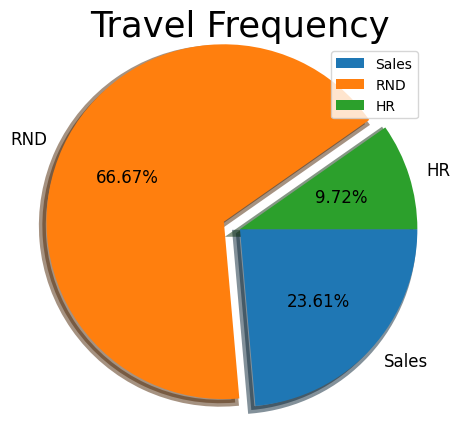

In [85]:
dep = Data['Department'].unique().tolist()
sales_dep = Data.loc[Data[(Data['BusinessTravel']=='Travel_Frequently') & (Data['Department']=='Sales')].index.values].index.values.tolist()
RND_dep = Data.loc[Data[(Data['BusinessTravel']=='Travel_Frequently') & (Data['Department']=='Research & Development')].index.values].index.values.tolist()
HR_dep = Data.loc[Data[(Data['BusinessTravel']=='Travel_Frequently') & (Data['Department']=='Human Resources')].index.values].index.values.tolist()

res = [len(sales_dep),len(RND_dep),len(HR_dep)]
lang = ['Sales','Research & Development','Human Resources']
ex = [0.0,0.12,0.0]
lang = ['Sales','RND','HR']
plt.pie(res,labels = lang,explode = ex,autopct = '%0.2f%%',shadow = True,radius = 1.2,startangle = 0,textprops={'fontsize':12},counterclock = False,wedgeprops = {'linewidth':5} )
plt.title("Travel Frequency",fontsize = 25.5)
plt.legend(loc=1)
plt.show()

### Research and Development department travels the most 

## Suppose the company wants to offer the pickup facilities for the employees having distance from home more than or equal to 20km

## ->Divide the Employees on the basis of DistanceFromHome parameter, range(1-5,5-10,10-15,15-20,20-25,25-30)Kms

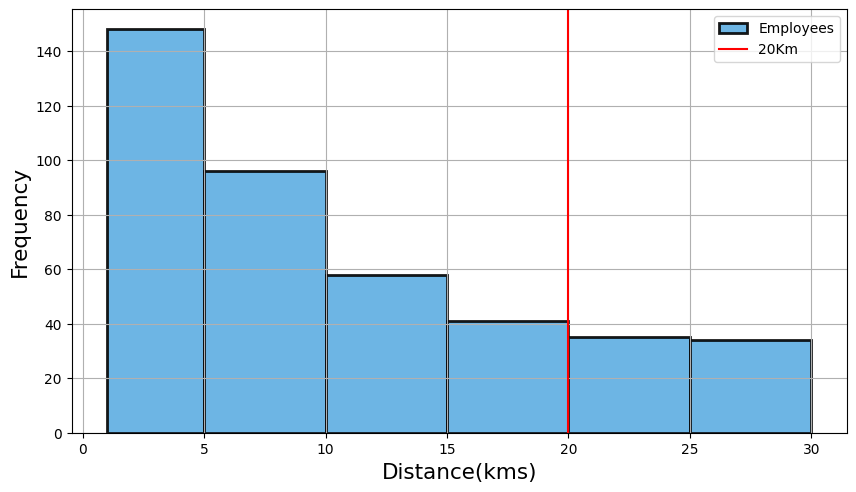

In [198]:
Dist = Data['DistanceFromHome'].tolist()
plt.hist(Dist,bins = [1,5,10,15,20,25,30],edgecolor = 'black',color = '#5dade2',alpha = 0.9,linewidth = 2,label = 'Employees')
plt.xlabel(r'Distance(kms)',fontsize = 15.5)
plt.ylabel(r'Frequency',fontsize = 15.5)
plt.axvline(20,color = 'red',label = '20Km')
plt.legend()
plt.grid()
plt.show()

## Which Department's employees are satisfied more with their working environment

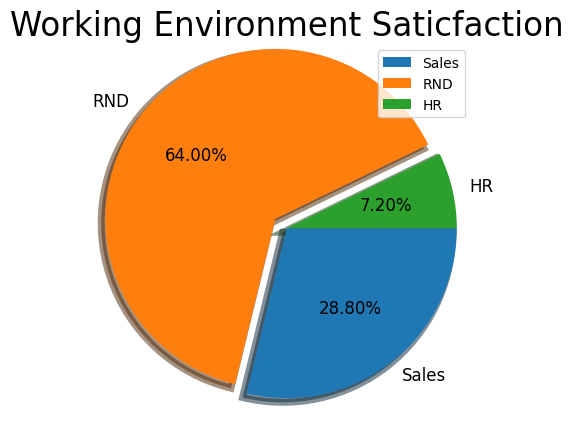

In [152]:
sales_dep = Data.loc[Data[(Data['Department']=='Sales') & (Data['EnvironmentSatisfaction']>=3)].index.values].index.values
RND_dep = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EnvironmentSatisfaction']>=3)].index.values].index.values
HR_dep = Data.loc[Data[(Data['Department']=='Human Resources') & (Data['EnvironmentSatisfaction']>=3)].index.values].index.values

res = [len(sales_dep),len(RND_dep),len(HR_dep)]
ex = [0.0,0.1,0.0]
lang = ['Sales','RND','HR']
plt.pie(res,labels = lang,explode = ex,autopct = '%0.2f%%',shadow = True,radius = 1.15,startangle = 0,textprops={'fontsize':12},counterclock = False,wedgeprops = {'linewidth':5} )
plt.title("Working Environment Saticfaction",fontsize = 23.5)
plt.legend(loc=1)
plt.show()

## Persons who travels frequently are able to maintain their work life balance or not

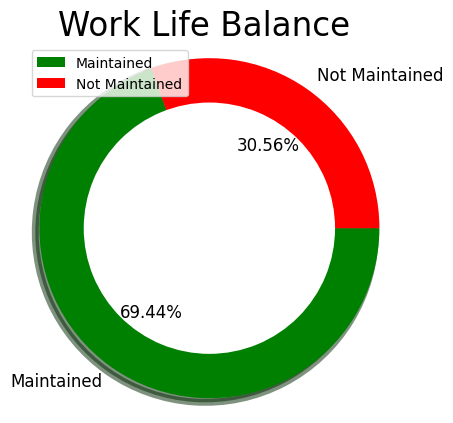

In [172]:
x1 = Data.loc[Data[(Data['BusinessTravel']=='Travel_Frequently') & (Data['WorkLifeBalance']>=3)].index.values].index.values
x2 = Data.loc[Data[(Data['BusinessTravel']=='Travel_Frequently') & (Data['WorkLifeBalance']<3)].index.values].index.values
res = [len(x1),len(x2)]
lang = ['Maintained','Not Maintained']
c = ['green','red']
ex = [0.0,0.0]
plt.pie(res,labels = lang,explode = ex,colors = c,autopct = '%0.2f%%',shadow = True,radius = 1.15,startangle = 0,textprops={'fontsize':12},counterclock = False,wedgeprops = {'linewidth':5} )
plt.pie([1],colors = 'white',radius = 0.85)
plt.title("Work Life Balance ",fontsize = 23.5)
plt.legend(loc=2)
plt.show()

### Around 69.44% employees who travels frequently are able to maintain their work life balance 

## What are the chances to get into the Research and Development Department on the basis of education 

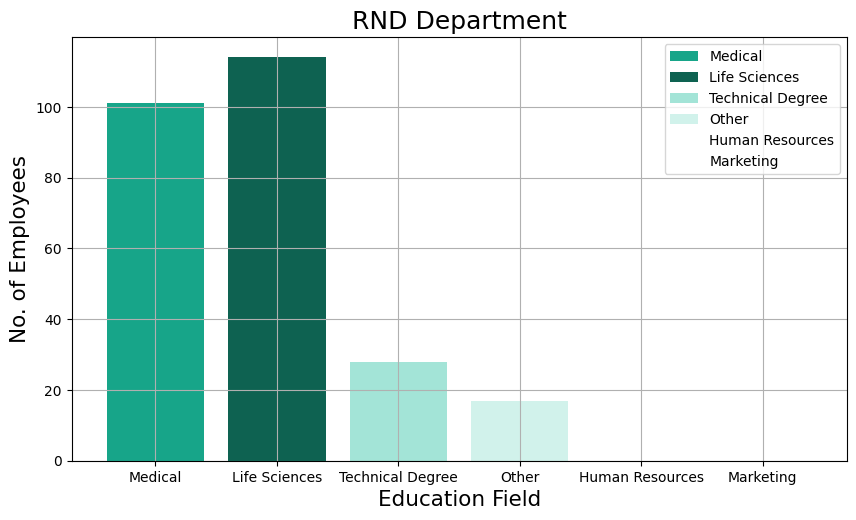

In [197]:
# ['Medical', 'Life Sciences', 'Technical Degree', 'Other','Human Resources', 'Marketing']
y1 = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EducationField']=='Medical')].index.values].index.values
y2 = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EducationField']=='Life Sciences')].index.values].index.values
y3 = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EducationField']=='Technical Degree')].index.values].index.values
y4 = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EducationField']=='Other')].index.values].index.values
y5 = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EducationField']=='Human Resources')].index.values].index.values
y6 = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EducationField']=='Marketing')].index.values].index.values
res = [len(y1),len(y2),len(y3),len(y4),len(y5),len(y6)]
lab = ['Medical','Life Sciences','Technical Degree','Other','Human Resources','Marketing']
plt.rcParams['figure.figsize']=(10,5.5)
plt.bar(lab,res,color = ['#17a589','#0e6251','#a3e4d7','#d1f2eb','white','white'],label = ['Medical','Life Sciences','Technical Degree','Other','Human Resources','Marketing'])
plt.legend()
plt.xlabel('Education Field',fontsize = 15.5)
plt.ylabel('No. of Employees',fontsize = 15.5)
plt.title("RND Department",fontsize = 18)
plt.grid()
plt.show()